In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
data = Path("../data")
plot_path = data / "plots"

# Load animes dataset

In [2]:
dfAnime = pd.read_csv(data / "AnimeList.csv")
dfAnime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


# Number of animes of each genre

In [3]:
# Animes may have multiple genres, and some genres may contain redundant spaces
unique_genres = dfAnime["genre"].str.split(",").explode().str.strip().value_counts()
unique_genres

Comedy           5251
Action           3253
Fantasy          2703
Adventure        2582
Drama            2294
Sci-Fi           2272
Kids             2003
Shounen          1771
Romance          1634
Slice of Life    1532
School           1406
Music            1351
Supernatural     1219
Hentai           1218
Mecha            1009
Historical        958
Magic             921
Seinen            698
Ecchi             685
Shoujo            643
Sports            624
Mystery           606
Parody            540
Super Power       533
Military          487
Space             436
Horror            413
Demons            373
Harem             353
Martial Arts      310
Dementia          293
Game              290
Psychological     288
Police            221
Samurai           175
Vampire           125
Thriller          100
Cars               92
Josei              81
Shounen Ai         79
Shoujo Ai          67
Yuri               41
Yaoi               39
Name: genre, dtype: int64

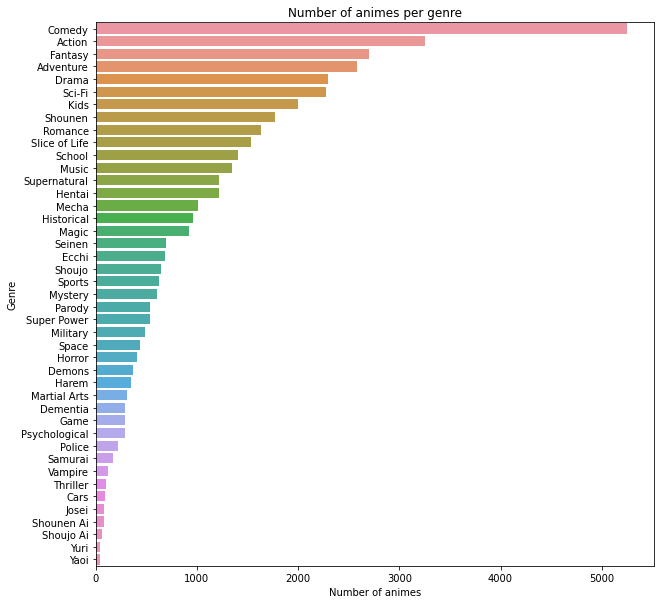

In [4]:
# barplot of the number of times each genre appears
plt.figure(figsize=(10, 10))
sns.barplot(x=unique_genres.values, y=unique_genres.index)

plot = sns.barplot(
    x=unique_genres.values,
    y=unique_genres.index
)
title = "Number of animes per genre"
plt.title(title)
plt.xlabel("Number of animes")
plt.ylabel("Genre")
plt.show()
plot.get_figure().savefig(plot_path / "genre_num_animes.png")

# Primary and secondary genres

In [5]:
dfCam = dfAnime.copy()[
    ["anime_id", "title", "image_url", "genre", "score", "premiered"]
]
# dfCam['premiered'] = dfCam['premiered'].apply(lambda x : x.split('/')[0])
dfCam.dropna(subset=["genre"], inplace=True)
dfCam = dfCam[dfCam["genre"] != None]
dfCam["genre"] = dfCam["genre"].apply(lambda x: [y.split('"')[0] for y in x.split(",")])
accGenre = {}


def accumulate(x):
    if x in [*accGenre]:
        return
    for genre in x:
        if not (genre in [*accGenre]):
            accGenre[genre] = 0
    return


dfCam["genre"].apply(lambda x: accumulate(x))


def countByGenre(x):
    for keys in accGenre.keys():
        if keys in x:
            accGenre[keys] += 1


dfCam["genre"].apply(lambda x: countByGenre(x))
print(accGenre)
sortAcc = sorted(accGenre.items(), key=lambda x: x[1])
listGenreDelete = [g for g, v in sortAcc if v < 120]
sortAcc = sortAcc[len(listGenreDelete) :][::-1]
print(listGenreDelete)
dfCam["genre"] = dfCam["genre"].apply(
    lambda x: [s for s in x if not (s in listGenreDelete)]
)
dfCam["length"] = dfCam["genre"].apply(lambda x: len(x))
dfCam = dfCam[dfCam["length"] > 0]
dfCam.drop(columns="length", inplace=True)
listGenre = [g for g, v in sortAcc if not (g in listGenreDelete)]
print(listGenre)
dfCam["Encode_genres"] = dfCam["genre"].apply(
    lambda x: [1 if s in x else 0 for s in listGenre]
)
dfCam[listGenre] = pd.DataFrame(dfCam.Encode_genres.tolist(), index=dfCam.index)
dfCam.drop(columns=["genre", "Encode_genres"], inplace=True)
dfCam.sort_values(by="score", inplace=True)


def fixUrl(x):
    split = x.split("/")
    split[2] = "cdn.myanimelist.net"
    res = ""
    for i in split:
        res = res + "/" + i
    return res[1:]


dfCam.dropna(subset=["image_url"], inplace=True)
dfCam["image_url"] = dfCam["image_url"].apply(lambda x: fixUrl(str(x)))
dfCam.head(5)

{'Comedy': 2762, ' Supernatural': 1170, ' Romance': 1501, ' Shounen': 1750, ' Parody': 467, ' School': 1360, ' Magic': 817, ' Shoujo': 635, ' Drama': 1568, ' Fantasy': 2194, 'Kids': 763, 'Magic': 104, ' Comedy': 2489, 'Action': 3253, 'Music': 885, ' Slice of Life': 794, ' Josei': 78, ' Harem': 241, ' Shounen Ai': 79, 'Slice of Life': 738, ' Adventure': 1220, ' Super Power': 525, 'Sci-Fi': 373, ' Ecchi': 556, ' Seinen': 688, ' Martial Arts': 304, 'Drama': 726, ' Game': 160, ' Sports': 477, ' Demons': 315, ' Historical': 734, 'Adventure': 1362, 'Ecchi': 129, ' Music': 466, ' Horror': 341, ' Mystery': 458, ' Sci-Fi': 1899, ' Samurai': 165, 'Hentai': 1028, ' Kids': 1240, ' Space': 405, ' Mecha': 916, ' Psychological': 246, 'Police': 14, 'Harem': 112, ' Vampire': 124, ' Military': 413, 'Space': 31, 'Mecha': 93, 'Game': 130, ' Thriller': 97, 'Fantasy': 509, ' Hentai': 190, ' Yaoi': 37, 'Cars': 38, ' Shoujo Ai': 67, 'Mystery': 148, ' Police': 207, 'Supernatural': 49, 'Sports': 147, 'Romance':

,anime_id,title,image_url,score,premiered,Action,Comedy,Comedy,Fantasy,Sci-Fi,...,Police,Hentai,Samurai,Game,Mystery,Sports,Romance,Game,Ecchi,Vampire
13138,21877,High Score Girl,https://cdn.myanimelist.net/images/anime/1668/...,0.0,Summer 2018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14283,37839,Boku wa Robot-goshi no Kimi ni Koi wo Suru Movie,https://cdn.myanimelist.net/images/anime/1007/...,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14284,37760,Mecha-ude,https://cdn.myanimelist.net/images/anime/1625/...,0.0,NaN,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14108,35213,Kai Feng Kidan Movie,https://cdn.myanimelist.net/images/anime/9/848...,0.0,NaN,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10697,36098,Kimi no Suizou wo Tabetai,https://cdn.myanimelist.net/images/anime/11/90...,0.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
statList = []
count2 = []
# count3 = []
nb = dfCam.shape[0]
for gp in listGenre[:10]:
    dfgp = dfCam[dfCam[gp] == 1]
    for g2 in listGenre:
        if g2 != gp:  # and not (([gp, g2] in count2) or ([g2, gp] in count2)):
            dfg2 = dfgp[dfgp[g2] == 1]
            countg2 = dfg2.shape[0]
            if countg2 != 0:
                for g3 in listGenre:
                    if (
                        g3 != g2 and g3 != gp
                    ):  # and not (([gp, g2, g3] in count3) or ([gp, g3, g2] in count3) or ([g2, gp, g3] in count3) or ([g2, g3, gp] in count3) or ([g3, gp, g2] in count3) or ([g3, g2, gp] in count3)):
                        dfg3 = dfg2[dfg2[g3] == 1]
                        countg3 = dfg3.shape[0]
                        if countg3 != 0:
                            statList.append(
                                [gp, g2, g3, countg3, countg3 * 100.0 / dfg2.shape[0]]
                            )
                            # count3.append([g3])
                statList.append(
                    [gp, g2, "T", dfg2.shape[0], dfg2.shape[0] * 100.0 / dfgp.shape[0]]
                )
                # count2.append([gp, g2])
    statList.append([gp, "T", "T", dfgp.shape[0], dfgp.shape[0] * 100.0 / nb])
# print(statList)
print(len(statList))

10904


In [7]:
dftest = pd.DataFrame(
    statList,
    columns=[
        "Genre_Principal",
        "Genre_Secondaire_1",
        "Genre_Secondaire_2",
        "Count",
        "Percent",
    ],
)
dftest.head(45)

,Genre_Principal,Genre_Secondaire_1,Genre_Secondaire_2,Count,Percent
0,Action,Comedy,Fantasy,277,28.150407
1,Action,Comedy,Sci-Fi,249,25.304878
2,Action,Comedy,Shounen,366,37.195122
3,Action,Comedy,Drama,120,12.195122
4,Action,Comedy,Romance,110,11.178862
5,Action,Comedy,School,111,11.280488
6,Action,Comedy,Kids,64,6.504065
7,Action,Comedy,Adventure,392,39.837398
8,Action,Comedy,Supernatural,122,12.398374
9,Action,Comedy,Mecha,109,11.077236


In [8]:
df_sum_genre = pd.DataFrame.from_dict(accGenre, orient="index", columns=["count_anime"])
df_sum_genre.index.name = "genre"
df_sum_genre.reset_index(inplace=True)
df_sum_genre.sort_values(by=["count_anime"], ascending=False, inplace=True)
df_sum_genre.head()

,genre,count_anime
13,Action,3253
0,Comedy,2762
12,Comedy,2489
9,Fantasy,2194
36,Sci-Fi,1899


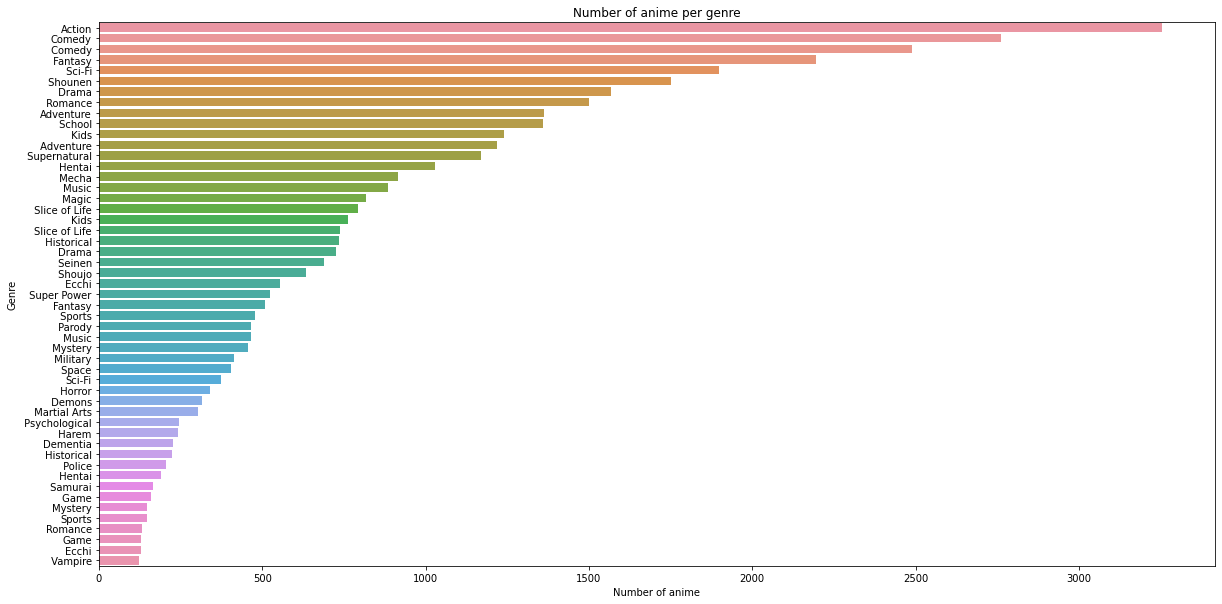

In [9]:
plt.figure(figsize=(20, 10))
plot = sns.barplot(
    x="count_anime",
    y="genre",
    data=df_sum_genre[df_sum_genre["count_anime"] >= 120],
    order=df_sum_genre[df_sum_genre["count_anime"] >= 120]["genre"].unique(),
)
title = "Number of anime per genre"
plt.title(title)
plt.xlabel("Number of anime")
plt.ylabel("Genre")
plt.show()
plot.get_figure().savefig(plot_path / (title + ".png"))